In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.selection.rnd import RandomSelection
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.operators.crossover.pntx import SinglePointCrossover

from pymoo.optimize import minimize
from pymoo.operators.mutation.pm import PolynomialMutation

from pymoo.visualization.scatter import Scatter

from pymoo.util.archive import default_archive

In [2]:
pop_size = 100
n_gen = 50
mutation_rate = 0.1
crossover_rate = 0.5

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

In [3]:
problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks)

algorithm = NSGA2(repair=TaskOffloadingRepair(),
               pop_size=pop_size,
               eliminate_duplicates=True,
               sampling=TaskOffloadingSampling(),
               selection=RandomSelection(),
               crossover=SinglePointCrossover(prob=crossover_rate, repair=TaskOffloadingRepair()),
               mutation=PolynomialMutation(prob=mutation_rate, repair=TaskOffloadingRepair()),
               archive=default_archive(problem)
               )

In [4]:
# problem.dataset_generator.get_machines()

In [5]:
res = minimize(problem,
           algorithm,
           ('n_gen', n_gen),
           seed=1,
           verbose=True)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      7 |             - |             -
     2 |      200 |      5 |  0.0730086839 |         ideal
     3 |      300 |      7 |  0.1066156479 |         ideal
     4 |      400 |      7 |  0.3359159204 |         nadir
     5 |      500 |     10 |  0.0433808081 |         ideal
     6 |      600 |      8 |  0.1292771189 |         ideal
     7 |      700 |      7 |  0.1506088000 |         ideal
     8 |      800 |     15 |  0.0746970140 |         ideal
     9 |      900 |     19 |  0.0836428215 |         ideal
    10 |     1000 |     14 |  0.0025994485 |         ideal
    11 |     1100 |     17 |  0.0808650940 |         ideal
    12 |     1200 |     15 |  0.0420989333 |         ideal
    13 |     1300 |     17 |  0.1111436237 |         ideal
    14 |     1400 |     15 |  0.0432928791 |             f
    15 |     1500 |      9 |  0.0859613869 |         ideal
    16 |     1600 |     16 |  0.0566998888 |         ide

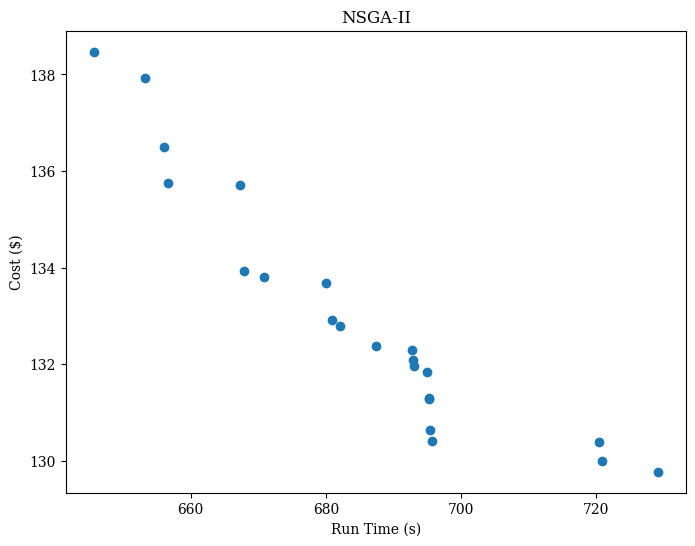

In [6]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="NSGA-II")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

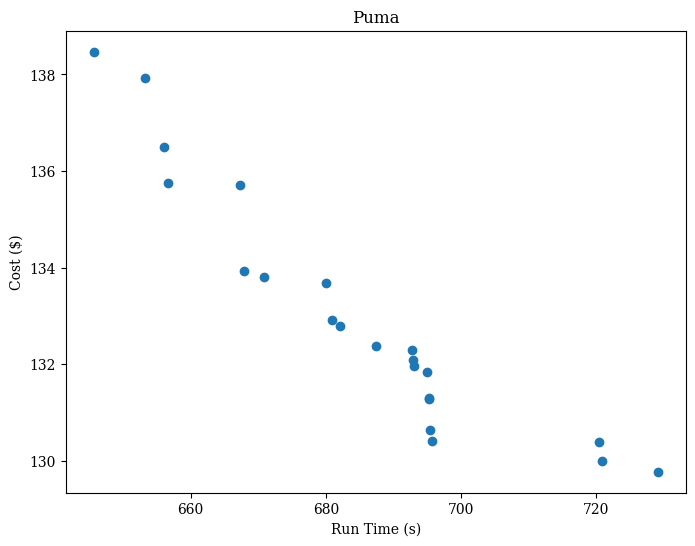

In [7]:
plot = Scatter(title="Puma")
plot.add(res.archive.get("F"))
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()